## Занятие 2. Pytorch туториал

In [1]:
! python -V

Python 3.10.4


In [2]:
! pip show torch

Name: torch
Version: 1.12.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\bzimka\anaconda3\envs\torchedu\lib\site-packages
Requires: typing_extensions
Required-by: efficientnet-pytorch, pretrainedmodels, timm, torchvision


In [3]:
import torch
import numpy as np

C:\Users\bzimka\Anaconda3\envs\torchedu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 1.1 Тензоры: создание и свойства

In [4]:
# создание тензоров
print(
    torch.zeros((2, 3)), 
)

print(
    torch.ones((3, 1)),
)

print(
    torch.rand((1, 2))
)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[0.3137, 0.5354]])


In [5]:
# создание тензоров
print(
    torch.tensor(42),
)

print(
    torch.tensor(np.random.rand(1, 2))
)

tensor(42)
tensor([[0.2554, 0.3594]], dtype=torch.float64)


In [6]:
t = torch.zeros((3, 2)) + 0.9
t.dtype

torch.float32

In [7]:
print(
    t.double().dtype, 
    t.long().dtype
)

t, t.long()

torch.float64 torch.int64


(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]]))

In [8]:
# форма тензора 
t.shape, t.size()

(torch.Size([3, 2]), torch.Size([3, 2]))

In [9]:
t.device

device(type='cpu')

In [10]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
t = t.to(device)
t

cuda:0


tensor([[0.9000, 0.9000],
        [0.9000, 0.9000],
        [0.9000, 0.9000]], device='cuda:0')

In [11]:
# копирование тензора - с формой, типом, девайсом
t, t.clone()

(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]], device='cuda:0'),
 tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]], device='cuda:0'))

#### 1.2 Тензоры: индексация и изменение формы

In [12]:
t = torch.arange(18, device=device)
t

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       device='cuda:0')

In [13]:
# интерпретация массива как многомерного тензора
t.view((2, 3, 3))

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]], device='cuda:0')

In [14]:
# можно сделать "срез" тензора также, как и в numpy
t_slice = t.view((2, 3, 3))[:, 1:, :]
t_slice

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')

In [15]:
# булевая индексация
t_slice[t_slice % 2 == 0]

tensor([ 4,  6,  8, 12, 14, 16], device='cuda:0')

In [16]:
# превращение boolean маски - в список индексов True 
(t_slice % 2 == 0).nonzero()

tensor([[0, 0, 1],
        [0, 1, 0],
        [0, 1, 2],
        [1, 0, 0],
        [1, 0, 2],
        [1, 1, 1]], device='cuda:0')

In [17]:
# numel и nelement - количество элементов в тензоре
print(
    t_slice.numel(), 
    t_slice.nelement()    
)

12 12


In [18]:
# len возвращает не количество элементов, а длину первой оси
print(
    t_slice.shape,
    len(t_slice)
)

torch.Size([2, 2, 3]) 2


In [19]:
t_slice.shape

torch.Size([2, 2, 3])

In [20]:
# устанавливаем новый порядок всех осей
t_slice_permute = t_slice.permute(0, 2, 1)
print(t_slice_permute)
print(t_slice_permute.shape)

tensor([[[ 3,  6],
         [ 4,  7],
         [ 5,  8]],

        [[12, 15],
         [13, 16],
         [14, 17]]], device='cuda:0')
torch.Size([2, 3, 2])


In [21]:
# меняем местами две оси
t_slice_tr = t_slice.transpose(1, 2)
print(t_slice)
print(t_slice_tr)

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
tensor([[[ 3,  6],
         [ 4,  7],
         [ 5,  8]],

        [[12, 15],
         [13, 16],
         [14, 17]]], device='cuda:0')


In [22]:
print(t_slice) 
print(t_slice.numel())

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
12


In [23]:
torch.arange(9).reshape((3,3)).is_contiguous()

True

================================================================================
### **Вопрос-1**: что получится при исполнении строчки ниже?

In [24]:
# t_slice.reshape(12)
#.contiguous().view(12)
#.view( t_slice.numel() )

================================================================================


### 1.3 Тензоры: объединение и разделение

In [25]:
# cat = concatenate
t2 = torch.cat([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
], dim=2)

print(t2.shape)
t2.shape

torch.Size([1, 3, 6])


torch.Size([1, 3, 6])

In [26]:
t2.is_contiguous()

True

In [27]:
t2.shape

torch.Size([1, 3, 6])

In [28]:
# ~un-concatenate вдоль оси
torch.unbind(t2, dim=2)[0]

tensor([[0., 0., 0.]])

In [29]:
# ~un-concatenate вдоль оси на произвольные фрагменты
torch.split(t2, [2, 4], dim=2)[1].shape

torch.Size([1, 3, 4])

In [30]:
# "найди отличие" от concatenate?

t3 = torch.stack([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
])
print(t3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


### 1.4 Тензоры: broadcast

In [31]:
# "единичные" оси можно убирать
print(
    t3.shape, 
    t3.squeeze(2).shape
)

torch.Size([2, 1, 3, 3]) torch.Size([2, 1, 3, 3])


In [32]:
# "единичные" оси можно добавлять
t2.shape, t2.unsqueeze(3).shape

(torch.Size([1, 3, 6]), torch.Size([1, 3, 6, 1]))

In [33]:
# вдоль единичныз осей для операций срабатывает broadcast, аналогично numpy
a = torch.arange(3)
b = torch.arange(6)

a.unsqueeze(0) - b.unsqueeze(1)

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0],
        [-3, -2, -1],
        [-4, -3, -2],
        [-5, -4, -3]])

================================================================================
### **Задачка-1**
Даны два набора 64-мерных векторов: A\[ N, 64 \] и B\[ M, 64 \]

Надо найти i и j такие, что скалярное произведение (A\[ i \], B\[ j \]) максимально.

Решение должно работать для батчей A и B.

In [34]:
t3.shape

torch.Size([2, 1, 3, 3])

In [35]:
torch.manual_seed(26092022)

a = torch.rand((2, 3, 64)) - 0.5
b = torch.randn((2, 13, 64))

#####
print(a.shape, a[:, :, None].shape)
print(b.shape, b[:, None].shape)
print( (a[:, :, None] * b[:, None]).shape)

dot_product = (a[:, :, None] * b[:, None]).sum(dim=-1)
#####

assert dot_product.shape == (2, 3, 13)

max_val, max_flat_index = torch.max(
    dot_product.view((2, -1)), dim=-1
)
print(f"Per batch max values:\n{max_val}")
print(f"\nPer batch max indices:\n{(dot_product == max_val.view((2, 1, 1))).nonzero()}")

torch.Size([2, 3, 64]) torch.Size([2, 3, 1, 64])
torch.Size([2, 13, 64]) torch.Size([2, 1, 13, 64])
torch.Size([2, 3, 13, 64])
Per batch max values:
tensor([4.3720, 5.8092])

Per batch max indices:
tensor([[0, 2, 6],
        [1, 2, 1]])


================================================================================

### 2.1 Модули: интерфейс и параметры

In [45]:
from torch import nn


class SoftmaxWithT(nn.Module):
    """
    exp(a*b) = exp(a) + exp(b)
    y[b, i] = exp( x[b,i] / T ) / Sum[j]( exp(x[b, j] / T ) )
    """
    def __init__(self, temperature=1.0):
        super().__init__() # не забывайте вызывать родительский конструктор!
        # param
        self.t = nn.Parameter(torch.tensor([temperature]), )

    def forward(self, x: torch.Tensor):
        #norm = torch.max(x, dim=-1, keepdims=True)[0]
        #x -= norm
        
        numer = torch.exp(x / self.t)
        denom = torch.sum(numer, axis=-1, keepdims=True)
        return numer / denom
        
sm = SoftmaxWithT()

In [46]:
t =  torch.randn(2, 5)
print(sm(t))
print(torch.nn.functional.softmax(t, dim=-1))

tensor([[0.3827, 0.1072, 0.0518, 0.2968, 0.1615],
        [0.0314, 0.8614, 0.0324, 0.0424, 0.0324]], grad_fn=<DivBackward0>)
tensor([[0.3827, 0.1072, 0.0518, 0.2968, 0.1615],
        [0.0314, 0.8614, 0.0324, 0.0424, 0.0324]])


### Вопрос-2. Как изменить SoftmaxWithT чтобы не было nan?

In [47]:
print(sm(
    (t * 100)
))
print(torch.nn.functional.softmax(t * 100, dim=-1))

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 9.0838e-12, 3.4415e-38],
        [0.0000e+00,        nan, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<DivBackward0>)
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 9.0838e-12, 3.4415e-38],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [39]:
# Модули можно "отправлять" на device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    t_gpu = t.to(device)
    # отправляются все parameters 
    sm_gpu = sm.to(device)
    y_gpu = sm_gpu(t_gpu)
    print(y_gpu)
else:
    print("Cuda is unavailable")

tensor([[0.4882, 0.0673, 0.1385, 0.1580, 0.1479],
        [0.1764, 0.1078, 0.0374, 0.2312, 0.4472]], device='cuda:0',
       grad_fn=<DivBackward0>)


### 2.2 Модули: стандартные компоненты

In [48]:
t = torch.randn((1, 3, 224, 224))

# Последовательность модулей
net = nn.Sequential(
    nn.BatchNorm2d(num_features=3),
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2, padding=1),
    nn.ReLU()
)

net

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (2): ReLU()
)

### 2.3 Модули: градиенты

In [49]:
_t_data = (np.random.rand(2, 10) - 0.5) * 5

# Тензоры могут требовать, либо не требовать градиентов
t = torch.tensor(
    _t_data,
    requires_grad=True
)
t

tensor([[-0.4661, -0.0713, -0.7551, -0.5692, -0.2518, -0.6104,  1.2227, -2.0538,
          0.9159, -2.3602],
        [-1.9399,  0.5989, -1.8706,  1.6757, -0.5213, -2.3556,  1.3583,  1.4318,
          0.7624,  0.2317]], dtype=torch.float64, requires_grad=True)

In [50]:
# при выполнении backward для всех* тензоров и параметров вычисляются градиенты (т.е. dL/dt)
y = sm(t)

y

tensor([[0.0625, 0.0928, 0.0468, 0.0564, 0.0775, 0.0541, 0.3385, 0.0128, 0.2491,
         0.0094],
        [0.0073, 0.0927, 0.0078, 0.2722, 0.0302, 0.0048, 0.1982, 0.2133, 0.1092,
         0.0642]], dtype=torch.float64, grad_fn=<DivBackward0>)

In [51]:
y[0, 0].backward()
t.grad

tensor([[ 0.0586, -0.0058, -0.0029, -0.0035, -0.0048, -0.0034, -0.0212, -0.0008,
         -0.0156, -0.0006],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], dtype=torch.float64)

In [52]:
# Вызов .grad.zero_() обнуляет градиент
t.grad.zero_()
print(t.grad)

# Присваивание None удаляет градиент
t.grad = None
print(t.grad)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
None


In [53]:
# градиенты накапливаются при каждом backward
# можно (но не обязательно!) делать backward не после каждого forward

for _ in range(10):
    y = sm(t)
    y[0, 0].backward()
t.grad

tensor([[ 0.5862, -0.0580, -0.0293, -0.0353, -0.0485, -0.0339, -0.2117, -0.0080,
         -0.1558, -0.0059],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], dtype=torch.float64)

In [54]:
t.grad = None

# Можно локально отключить вычисление градиентов - например на валидации 
# Для больших сетей это ускорит работу

with torch.no_grad():
    y = sm(t)    
    
    # Вызов backward приведет к ошибке
    # y[0, 0].backward()

print(t.grad)

None


In [55]:
list(sm.named_parameters())

[('t',
  Parameter containing:
  tensor([1.], requires_grad=True))]

In [56]:
sm.t.grad

tensor([0.6218])

In [57]:
sm.zero_grad()
sm.t.grad

tensor([0.])

In [58]:
# Не все операции дифференцируемы

class Argmax(nn.Module):
    def forward(self, x: torch.Tensor):
        return torch.argmax(x, dim=-1, keepdims=True)

    
net = nn.Sequential(
    SoftmaxWithT(),
    Argmax()
)
y = net(t)
y

tensor([[6],
        [3]])

#### 3.1 ResNet: пишем блок

[1] Identity Mappings in Deep Residual Networks.
https://arxiv.org/abs/1603.05027

![resnet blocks were not loaded](resnet_blocks.png "Resnet Blocks[1]")

In [59]:
class ResidualBlock(nn.Module):
    def __init__(self, *, in_channels, out_channels, kernel_size, padding, stride, is_projection_shortcut=False):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, padding=padding, stride=stride),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, padding=padding, stride=1),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(),
        )
        if is_projection_shortcut:
            self.proj = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, stride=stride, kernel_size=1, padding=0)
        else:
            self.proj = lambda x: x

    def forward(self, x):
        y = self.net(x)
        z = self.proj(x)
        return y + z
        

_test_block = ResidualBlock(in_channels=16, out_channels=26, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True)

t = torch.randn((1, 16, 96, 96))
y = _test_block(t)
y.shape

torch.Size([1, 26, 48, 48])

#### 3.2 ResNet: пишем сеть
[2] Deep Residual Learning for Image Recognition.
https://arxiv.org/abs/1512.03385


![resnet arch was not loaded](resnet_arch.png "Resnet Arch")

In [72]:
class ResidualNet18(nn.Module):
    def __init__(self, n_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding='same'),
            
            ResidualBlock(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),
            ResidualBlock(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),
            
            ResidualBlock(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True),
            ResidualBlock(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),

            ResidualBlock(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True),
            ResidualBlock(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),

            ResidualBlock(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True),
            ResidualBlock(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),
            
        )
        self.pooling  = lambda x: torch.mean(x.view(x.size(0), x.size(1), -1), dim=-1)
        self.head = nn.Sequential(
            nn.Linear(in_features=512, out_features=n_classes),
            # !!!!!
            nn.LogSoftmax(dim=-1)
            # !!!!!
        )
        
    def forward(self, x, return_featuremap=False): 
        """
        Args:
            x: Tensor[B, 3, H, W]
            return_featuremap: возвращать ли помимо классов выход последней свертки перед пулингом
        Returns:
            y: Tensor[B, N_classes]
        """
        y = self.net(x)
        y = self.pooling(y)
        cls_logits = self.head(y)
        if not return_featuremap:
            return cls_logits
        return cls_logits, y
        
_test_net = ResidualNet18(n_classes=10)
t = torch.randn(8, 3, 32, 32)
y, yf = _test_net(t, return_featuremap=True)

y.shape, yf.shape, sum(p.numel() for p in _test_net.parameters() if p.requires_grad)


(torch.Size([8, 10]), torch.Size([8, 512]), 11176842)

In [61]:
from torchvision.models import resnet18
_default_renset = resnet18()
sum(p.numel() for p in _default_renset.parameters() if p.requires_grad)

11689512

#### 3.3 ResNet: готови данные CIFAR10


In [75]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from tqdm import tqdm

In [76]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path = Path().absolute() / 'data'

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [77]:
plt.rcParams['figure.figsize'] = [18, 12]

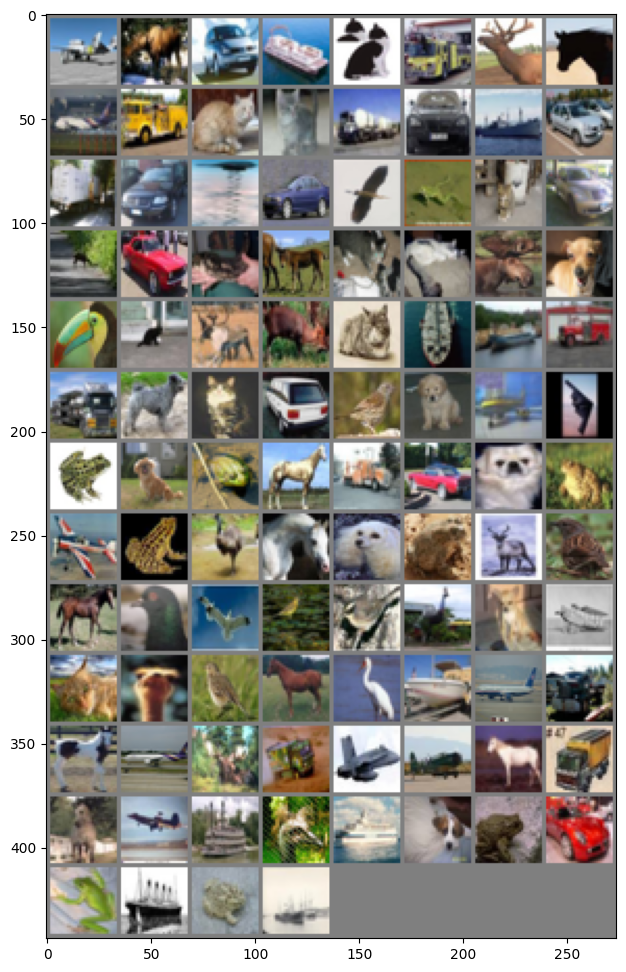

plane  deer   car  ship   cat truck  deer horse plane truck   cat   cat truck   car  ship   car truck   car plane   car  bird  frog   cat   car  deer   car   cat horse   cat   cat  deer   dog  bird   cat  deer  deer   cat  ship  ship truck truck   dog   cat   car  bird   dog plane plane  frog   dog  frog horse truck   car   dog  frog plane  frog  bird horse   dog  frog  deer  bird horse  bird  bird  bird  bird  bird   dog plane   cat  bird  bird horse  bird  ship plane truck horse plane  deer truck plane plane horse truck horse plane  ship  bird  ship   dog  frog   car  frog  ship  frog  ship


In [78]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#### 3.4 ResNet: обучем на CIFAR10

In [79]:
model = ResidualNet18()

In [80]:
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3)

In [81]:
criterion = torch.nn.NLLLoss()

In [82]:
n_print_loss = 100
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

model = model.to(device)

for epoch in range(5):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=50000/batch_size):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % n_print_loss == (n_print_loss - 1): 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

 20%|█████████████████████                                                                                  | 102/500.0 [00:05<00:19, 20.31it/s]

[1,   100] loss: 0.095


 40%|█████████████████████████████████████████▍                                                             | 201/500.0 [00:09<00:14, 20.35it/s]

[1,   200] loss: 0.081


 61%|██████████████████████████████████████████████████████████████▍                                        | 303/500.0 [00:14<00:09, 20.40it/s]

[1,   300] loss: 0.075


 80%|██████████████████████████████████████████████████████████████████████████████████▊                    | 402/500.0 [00:19<00:04, 20.65it/s]

[1,   400] loss: 0.070


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌| 498/500.0 [00:24<00:00, 20.47it/s]

[1,   500] loss: 0.067


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:24<00:00, 20.25it/s]
 21%|█████████████████████▏                                                                                 | 103/500.0 [00:05<00:19, 20.42it/s]

[2,   100] loss: 0.064


 40%|█████████████████████████████████████████▌                                                             | 202/500.0 [00:09<00:14, 20.37it/s]

[2,   200] loss: 0.061


 60%|██████████████████████████████████████████████████████████████                                         | 301/500.0 [00:14<00:09, 20.61it/s]

[2,   300] loss: 0.058


 81%|███████████████████████████████████████████████████████████████████████████████████                    | 403/500.0 [00:19<00:04, 20.27it/s]

[2,   400] loss: 0.056


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:24<00:00, 20.26it/s]

[2,   500] loss: 0.054



 21%|█████████████████████▏                                                                                 | 103/500.0 [00:05<00:19, 20.42it/s]

[3,   100] loss: 0.050


 40%|█████████████████████████████████████████▌                                                             | 202/500.0 [00:09<00:14, 20.58it/s]

[3,   200] loss: 0.049


 60%|██████████████████████████████████████████████████████████████                                         | 301/500.0 [00:14<00:09, 20.33it/s]

[3,   300] loss: 0.047


 81%|███████████████████████████████████████████████████████████████████████████████████                    | 403/500.0 [00:19<00:04, 20.28it/s]

[3,   400] loss: 0.045


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:24<00:00, 20.22it/s]

[3,   500] loss: 0.045



 21%|█████████████████████▏                                                                                 | 103/500.0 [00:05<00:19, 20.19it/s]

[4,   100] loss: 0.040


 40%|█████████████████████████████████████████▌                                                             | 202/500.0 [00:09<00:14, 20.26it/s]

[4,   200] loss: 0.040


 61%|██████████████████████████████████████████████████████████████▌                                        | 304/500.0 [00:15<00:09, 20.17it/s]

[4,   300] loss: 0.040


 81%|███████████████████████████████████████████████████████████████████████████████████                    | 403/500.0 [00:19<00:04, 20.09it/s]

[4,   400] loss: 0.038


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:24<00:00, 20.03it/s]

[4,   500] loss: 0.037



 21%|█████████████████████▏                                                                                 | 103/500.0 [00:05<00:19, 20.15it/s]

[5,   100] loss: 0.033


 41%|██████████████████████████████████████████                                                             | 204/500.0 [00:10<00:14, 20.16it/s]

[5,   200] loss: 0.032


 60%|██████████████████████████████████████████████████████████████▏                                        | 302/500.0 [00:15<00:09, 20.11it/s]

[5,   300] loss: 0.032


 81%|███████████████████████████████████████████████████████████████████████████████████                    | 403/500.0 [00:20<00:04, 20.09it/s]

[5,   400] loss: 0.031


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:25<00:00, 19.88it/s]

[5,   500] loss: 0.031
Finished Training


#### 3.5 ResNet: замеряем качество

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
correct_labels = []
predicted_labels = []

model = model.to('cpu')

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        predicted_labels = [*predicted_labels, *predictions]
        correct_labels = [*correct_labels, *labels]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:00<00:00,  1.65it/s]


In [85]:
matrix = confusion_matrix(correct_labels, predicted_labels)

In [86]:
def plot_confusion_matrix(mtx, cls_names):
    fig, ax = plt.subplots()
    im = ax.imshow(mtx, cmap="seismic")
    
    try:
        ax.set_xticks(np.arange(len(cls_names)))
        ax.set_xticklabels(cls_names)
        ax.set_yticks(np.arange(len(cls_names)))
        ax.set_yticklabels(cls_names)
    except:
        # matplotlib api changed
        pass
        
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cls_names)):
        for j in range(len(cls_names)):
            text = ax.text(j, i, mtx[i, j],
                           ha="center", va="center")
    
    acc = (np.eye(len(mtx)) * mtx).sum() / (mtx.sum() + 1e-4)
    ax.set_title(f"Confusion matrix CIFAR10. Accuracy: {acc * 100: .2f} %")
    fig.tight_layout()
    plt.show()

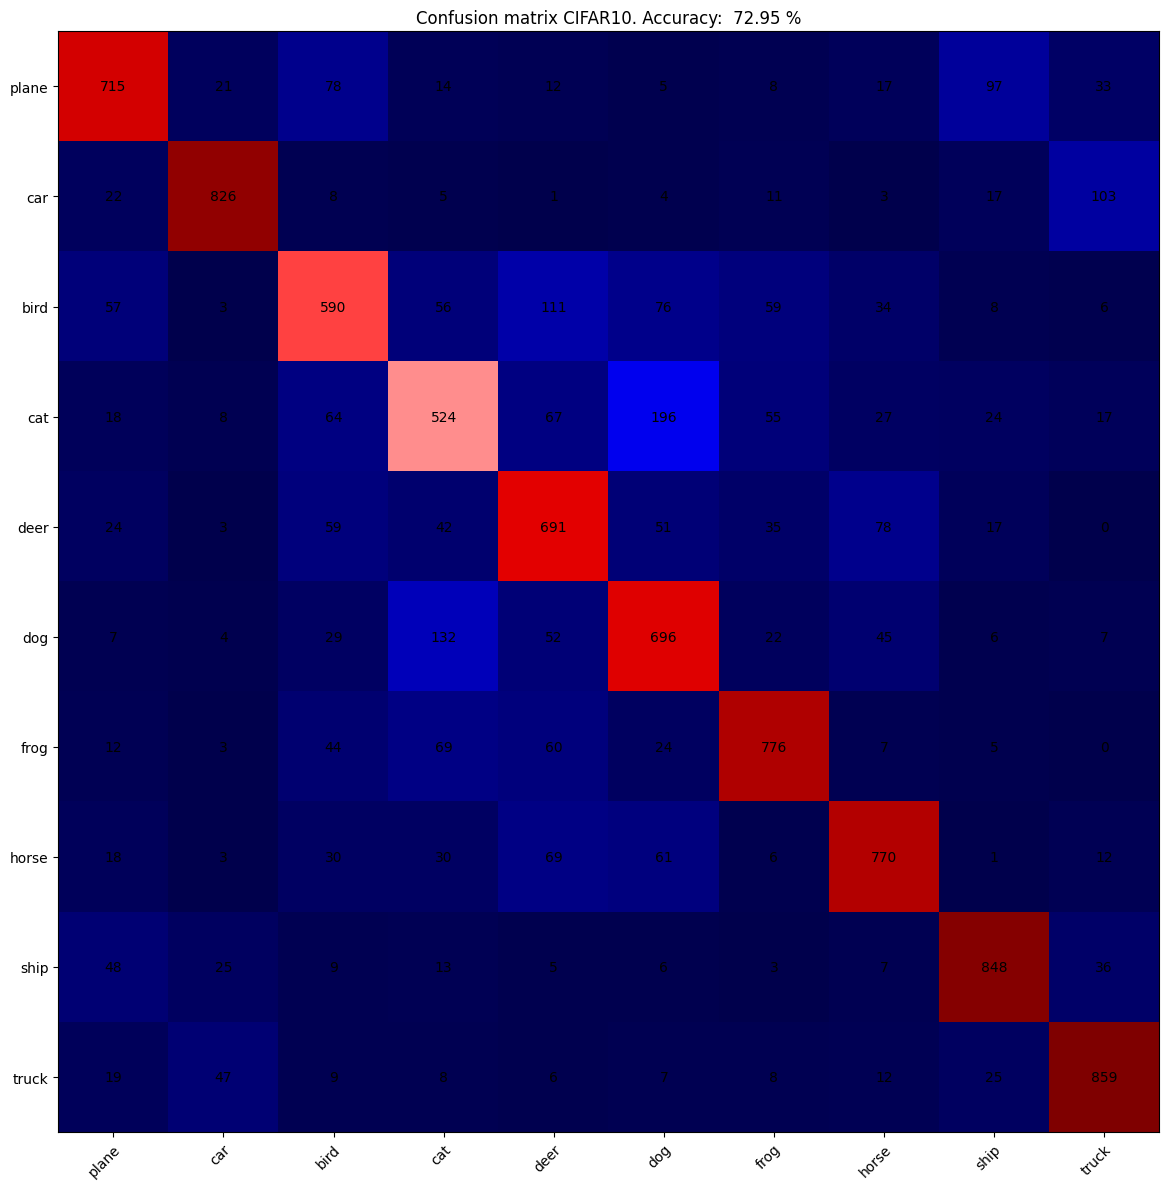

In [87]:
plot_confusion_matrix(matrix, classes)